In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib

In [2]:
df = joblib.load("Data/limpio2.joblib")

In [3]:
pd.options.display.float_format = '{:.0f}'.format

In [4]:
df.describe()

,km,potencia,precio,tiemo_venta,year_registro,mes_registro,year_venta,mes_venta,precio_log10
count,4717,4717,4717,4717,4717,4717,4717,4717,4717
mean,139448,129,16137,64,2013,6,2018,5,4
std,57527,39,9088,27,2,3,0,2,0
min,64,25,1500,7,1995,1,2007,1,3
25%,101705,100,11100,49,2012,3,2018,3,4
50%,140084,120,14300,58,2013,6,2018,5,4
75%,174690,135,18800,71,2014,9,2018,7,4
max,484615,423,178500,274,2017,12,2018,9,5


In [5]:
df.shape

(4717, 48)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4717 entries, 0 to 4716
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   km                           4717 non-null   float64
 1   potencia                     4717 non-null   float64
 2   volante_regulable            4717 non-null   bool   
 3   aire_acondicionado           4717 non-null   bool   
 4   camara_trasera               4717 non-null   bool   
 5   asientos_traseros_plegables  4717 non-null   bool   
 6   elevalunas_electrico         4717 non-null   bool   
 7   bluetooth                    4717 non-null   bool   
 8   gps                          4717 non-null   bool   
 9   alerta_lim_velocidad         4717 non-null   bool   
 10  precio                       4717 non-null   float64
 11  tiemo_venta                  4717 non-null   int64  
 12  year_registro                4717 non-null   int32  
 13  mes_registro      

In [7]:
df.head()

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,...,tipo_coche_van,modelo_agrupado_M1,modelo_agrupado_M2,modelo_agrupado_M3,modelo_agrupado_M4,modelo_agrupado_M5,modelo_agrupado_M6,modelo_agrupado_M7,modelo_agrupado_Otros,modelo_agrupado_XSERIES
0,140411,100,True,True,False,False,True,True,True,False,...,False,True,False,False,False,False,False,False,False,False
1,13929,317,True,True,False,False,False,True,True,True,...,False,False,False,False,False,False,False,False,True,False
2,183297,120,False,False,False,False,True,False,True,False,...,False,False,False,True,False,False,False,False,False,False
3,128035,135,True,True,False,False,True,True,True,True,...,False,False,False,False,True,False,False,False,False,False
4,97097,160,True,True,False,False,False,True,True,True,...,False,False,False,False,True,False,False,False,False,False


In [10]:
del df['precio']

In [13]:
from sklearn.model_selection import train_test_split


# Dividir los datos en características (X) y objetivo (y)
X = df.drop(columns=['precio_log10'])
y = df['precio_log10']

# Dividir el conjunto de datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imprimir los tamaños de los conjuntos de entrenamiento y prueba
print("Tamaño de conjunto de entrenamiento (X_train, y_train):", X_train.shape, y_train.shape)
print("Tamaño de conjunto de prueba (X_test, y_test):", X_test.shape, y_test.shape)


Tamaño de conjunto de entrenamiento (X_train, y_train): (3773, 46) (3773,)
Tamaño de conjunto de prueba (X_test, y_test): (944, 46) (944,)


In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [16]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
regression_model = LinearRegression()
regression_model.fit(X_train_scaled, y_train)

LinearRegression()

In [18]:
# Realizar predicciones en el conjunto de entrenamiento y prueba
y_train_pred = regression_model.predict(X_train_scaled)
y_test_pred = regression_model.predict(X_test_scaled)


In [19]:
# Métricas para el conjunto de entrenamiento
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

In [20]:
# Métricas para el conjunto de prueba
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

In [21]:
# Imprimir las métricas para el conjunto de entrenamiento
print('TRAIN')
print('MAE:', round(mae_train, 4))
print('MSE:', round(mse_train, 4))
print('RMSE:', round(rmse_train, 4))
print('R2-score:', round(r2_train, 4))

TRAIN
MAE: 0.0581
MSE: 0.0075
RMSE: 0.0864
R2-score: 0.8432


In [22]:

print()

# Imprimir las métricas para el conjunto de prueba
print('TEST')
print('MAE:', round(mae_test, 4))
print('MSE:', round(mse_test, 4))
print('RMSE:', round(rmse_test, 4))
print('R2-score:', round(r2_test, 4))


TEST
MAE: 0.0592
MSE: 0.0077
RMSE: 0.088
R2-score: 0.8382


In [25]:
    # Visualizacion
              # Visualizacion
import matplotlib.pyplot as plt


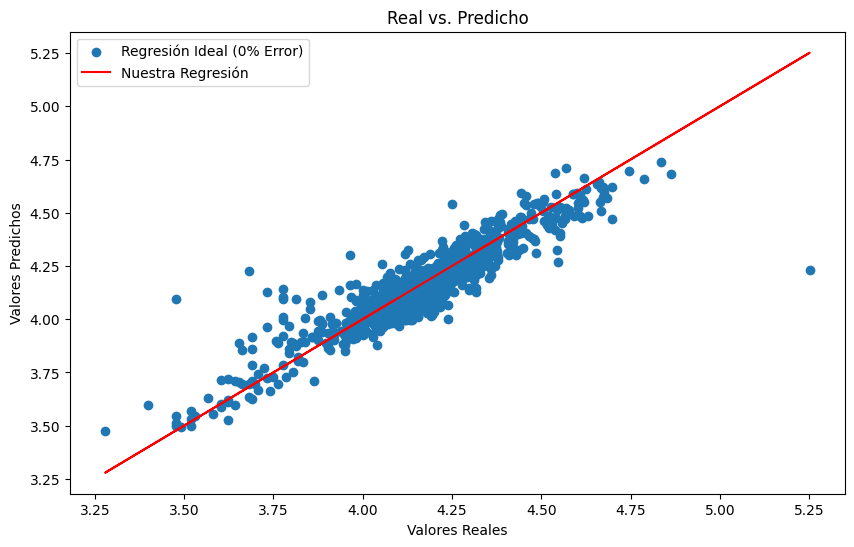

In [26]:
plt.figure(figsize=[10,6])
plt.scatter(y_test, y_test_pred)
plt.plot(y_test, y_test, 'r')
plt.title('Real vs. Predicho')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.legend(['Regresión Ideal (0% Error)', 'Nuestra Regresión'])
plt.show()
